In [ ]:
import tensorflow as tf
import pandas as pd
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt



## print them to see if they are installed or not
print(tf.__version__)
print(pd.__version__)
print(keras.__version__)
print(np.__version__)


2.6.0
1.1.5
2.6.0
1.19.5


In [ ]:
## Downlaod Dataset
## Google drive link https://drive.google.com/file/d/19p3qtGNlc_p12bi3wnbXtELUAR7CE6p8
!gdown --id '19p3qtGNlc_p12bi3wnbXtELUAR7CE6p8'

Downloading...
From: https://drive.google.com/uc?id=19p3qtGNlc_p12bi3wnbXtELUAR7CE6p8
To: /content/data.zip
1.45GB [00:11, 128MB/s]


In [ ]:
## Unzip data
!unzip data.zip

Archive:  data.zip
  inflating: from-to-rqd.xlsx        
  inflating: label.xlsx              
   creating: test-rqd/
  inflating: test-rqd/M3-BH3299-1.jpg  
  inflating: test-rqd/M3-BH3299-2.jpg  
  inflating: test-rqd/M3-BH3299-3.jpg  
  inflating: test-rqd/M3-BH3299-4.jpg  
  inflating: test-rqd/M3-BH3299-5.jpg  
  inflating: test-rqd/M3-BH3299-6.jpg  
  inflating: test-rqd/M3-BH3299-7.jpg  
  inflating: test-rqd/M3-BH3299-8.jpg  
  inflating: test-rqd/M3-BH3299-9.jpg  
  inflating: test-rqd/M3-BH3300-1.jpg  
  inflating: test-rqd/M3-BH3300-10.jpg  
  inflating: test-rqd/M3-BH3300-11.jpg  
  inflating: test-rqd/M3-BH3300-12.jpg  
  inflating: test-rqd/M3-BH3300-13.jpg  
  inflating: test-rqd/M3-BH3300-14.jpg  
  inflating: test-rqd/M3-BH3300-15.jpg  
  inflating: test-rqd/M3-BH3300-16.jpg  
  inflating: test-rqd/M3-BH3300-17.jpg  
  inflating: test-rqd/M3-BH3300-18.jpg  
  inflating: test-rqd/M3-BH3300-2.jpg  
  inflating: test-rqd/M3-BH3300-3.jpg  
  inflating: test-rqd/M3-BH3300-4

In [ ]:
## Load dataset
fromTo_df = pd.read_excel('from-to-rqd.xlsx')
fromTo_df.head()

,RunId,from,to
0,M3-BH3299-1-1,0.0,2.2
1,M3-BH3299-1-2,2.2,3.3
2,M3-BH3299-1-3,3.3,4.4
3,M3-BH3299-2-1,4.4,4.9
4,M3-BH3299-2-2,4.9,6.5


In [ ]:
## Load the labels dataset
label_df = pd.read_excel('label.xlsx')
label_df.head()

,image_name,label_name,xmin,ymin,width,height,image_width,image_height
0,M3-BH130-1.jpg,wood,2412,1552,152,197,4020,2929
1,M3-BH130-1.jpg,wood,2917,2072,140,220,4020,2929
2,M3-BH130-1.jpg,wood,3820,1567,167,209,4020,2929
3,M3-BH130-1.jpg,wood,3603,2341,201,186,4020,2929
4,M3-BH130-1.jpg,wood,1676,2713,159,171,4020,2929


In [ ]:
print(label_df[label_df.label_name != 'wood'].head(1))

       image_name  label_name  xmin  ...  height  image_width  image_height
5  M3-BH130-1.jpg  +10cm rock    94  ...     209         4020          2929

[1 rows x 8 columns]


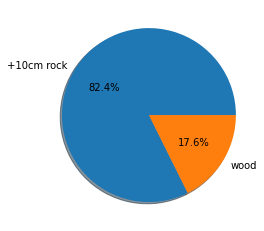

In [ ]:
## Plot the woods that are shown to devide each diggings
type_values = label_df.label_name.value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(type_values.values, labels=type_values.index,shadow=True,autopct='%1.1f%%')
plt.show()

In [ ]:
## Get Dataset into batches
train_ds = keras.preprocessing.image_dataset_from_directory('train',labels=None)

filePaths = train_ds.file_paths

## We used Box instead of persian word gamane
## box Array
box_arr = []
for name in filePaths:
  ## Slice and get the box names
  sliced = name[9:]
  ## Get exclusively box names
  sliced = sliced.split('-')[0]
  box_arr.append(sliced)

## Get all the unique boxes
box_names = np.unique(box_arr)
print('unique box names',box_names)
print('files count', len(filePaths))

Found 156 files belonging to 1 classes.
unique box names ['BH130' 'BH13150' 'BH13250' 'BH13400' 'BH300']
files count 156


max digging value:  3.1000000000000085





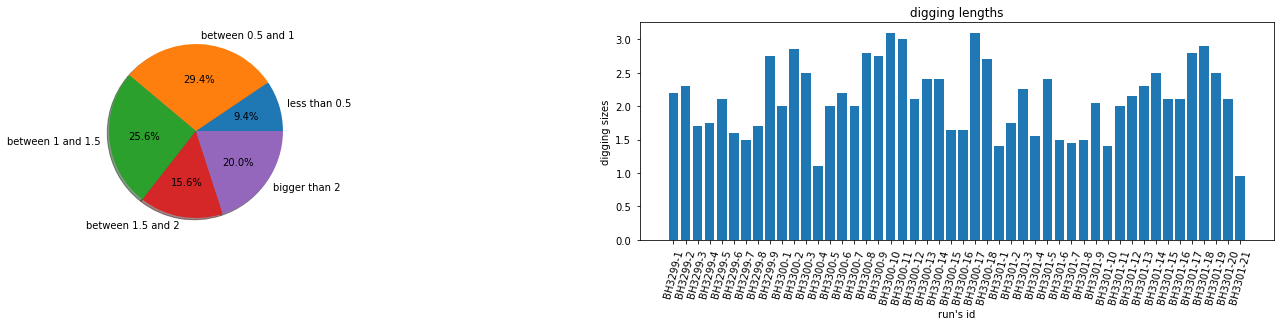

In [ ]:
################################ Get diging lengths ################################
def get_dig_lenghts(dataframe):
  each_box_len = []
  for run_id in dataframe.RunId:
    row = dataframe[dataframe.RunId == run_id]
    len_value = row['to'] - row['from']
    each_box_len.append(len_value.values[0])
  return each_box_len

## Get the Box name and the run numbers
def getRun_box_names(dataframe):
  array = []
  for name in dataframe.RunId:
    ## Just get the image name and the run number from it
    sliced = name.split('.')
    sliced_name = sliced[0].split('-')
    imageAndRunName = sliced_name[1] +'-'+ sliced_name[2]  
    array.append(imageAndRunName)
  return array

diging_lenghts = get_dig_lenghts(fromTo_df)
## Get the max digging value
print('max digging value: ', np.max(diging_lenghts))

## show diggings values in a chart
len_dict = {
    'less than 0.5':0,
    'between 0.5 and 1': 0,
    'between 1 and 1.5': 0,
    'between 1.5 and 2':0,
    'bigger than 2':0
    }
## fill the dictionary
for value in diging_lenghts:
  if value < 0.5:
    len_dict['less than 0.5'] +=1
  elif value < 1:
     len_dict['between 0.5 and 1'] +=1
  elif value <1.5:
    len_dict['between 1 and 1.5'] +=1
  elif value <2:
    len_dict['between 1.5 and 2'] +=1
  else:
    len_dict['bigger than 2'] +=1

print('\n\n')
## Plot it
fig1, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(25,4))

ax1.pie(len_dict.values(), labels=len_dict.keys() ,shadow=True,autopct='%1.1f%%')
box_arr = getRun_box_names(fromTo_df)
ax2.bar(box_arr ,diging_lenghts)
ax2.set_xlabel('run\'s id')
ax2.set_ylabel('digging sizes')
ax2.tick_params(pad=5)

plt.xticks(rotation=75)
plt.title('digging lengths')
plt.show()



In [ ]:
################################ Get the max 'to' value ################################

to_values = []
for run_id in fromTo_df.RunId:
  row = fromTo_df[fromTo_df.RunId == run_id]
  len_value = row['to']
  to_values.append(len_value.values[0])

## Get the max 'to' value
max_value = np.max(to_values)
row = fromTo_df[fromTo_df.to == max_value]
print(row,'\n\n')


              RunId  from     to
179  M3-BH3301-21-1  94.7  95.65 


